In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(style="whitegrid")

In [4]:
data = pd.DataFrame({
    'StudentID': range(1, 21),
    'Age': [18, 19, 18, 20, 21, 18, 19, 20, 21, 22, 23, np.nan, 20, 21, 19, 18, 17, 22, 21, 20],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'GPA': [3.5, 3.8, 2.9, 3.2, 3.0, 4.1, 2.7, 3.4, 3.6, 3.0, 3.2, 3.8, 3.1, 2.8, 3.7, 3.3, 3.2, 3.9, 4.5, 3.4],
    'MathScore': [88, 92, 75, 85, 80, 101, 70, 82, 95, 79, 84, 90, 81, 77, 89, 83, 88, 91, 105, 87],
    'EnglishScore': [85, 90, 78, 82, 76, 84, 75, np.nan, 88, 80, 83, 89, 80, 77, 90, 86, 84, 92, 95, 81],
    'ScienceScore': [90, 88, 79, 85, 81, 100, 74, 88, 92, 76, 80, 86, 84, 79, 87, 82, 89, 93, 110, 83],
    'AttendanceRate': [95, 96, 90, 88, 100, 110, 85, 92, 94, 96, 98, 87, 91, 88, 97, 95, 93, 92, 120, 89],
    'StudyHours': [10, 15, 5, 20, 8, 30, 3, 10, 12, 9, 11, 25, 8, 7, 14, 10, 6, 15, 35, 9]
})

In [5]:
print("Initial Dataset:")
print(data.head())

Initial Dataset:
   StudentID   Age Gender  GPA  MathScore  EnglishScore  ScienceScore  \
0          1  18.0      M  3.5         88          85.0            90   
1          2  19.0      F  3.8         92          90.0            88   
2          3  18.0      M  2.9         75          78.0            79   
3          4  20.0      F  3.2         85          82.0            85   
4          5  21.0      M  3.0         80          76.0            81   

   AttendanceRate  StudyHours  
0              95          10  
1              96          15  
2              90           5  
3              88          20  
4             100           8  


In [8]:
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
StudentID         0
Age               1
Gender            0
GPA               0
MathScore         0
EnglishScore      1
ScienceScore      0
AttendanceRate    0
StudyHours        0
dtype: int64


In [11]:
numeric_cols = ['Age', 'EnglishScore']
for col in numeric_cols:
    median_val = data[col].median()
    data[col].fillna(median_val)
    print(f"Filled missing values in '{col}' with median value: {median_val}")

Filled missing values in 'Age' with median value: 20.0
Filled missing values in 'EnglishScore' with median value: 84.0


In [14]:
print("\nMissing values after imputation:")
print(data.isnull().sum())


Missing values after imputation:
StudentID         0
Age               0
Gender            0
GPA               0
MathScore         0
EnglishScore      0
ScienceScore      0
AttendanceRate    0
StudyHours        0
dtype: int64


In [15]:
data.loc[data['GPA'] > 4.0, 'GPA'] = 4.0
print("\nGPA values after capping:")
print(data['GPA'])


GPA values after capping:
0     3.5
1     3.8
2     2.9
3     3.2
4     3.0
5     4.0
6     2.7
7     3.4
8     3.6
9     3.0
10    3.2
11    3.8
12    3.1
13    2.8
14    3.7
15    3.3
16    3.2
17    3.9
18    4.0
19    3.4
Name: GPA, dtype: float64


In [18]:
data.loc[data['MathScore'] > 100, 'MathScore'] = 100
data.loc[data['ScienceScore'] > 100, 'ScienceScore'] = 100
print("\nMathScore and ScienceScore after capping:")
print(data[['MathScore', 'ScienceScore']])


MathScore and ScienceScore after capping:
    MathScore  ScienceScore
0          88            90
1          92            88
2          75            79
3          85            85
4          80            81
5         100           100
6          70            74
7          82            88
8          95            92
9          79            76
10         84            80
11         90            86
12         81            84
13         77            79
14         89            87
15         83            82
16         88            89
17         91            93
18        100           100
19         87            83


In [19]:
data.loc[data['AttendanceRate'] > 100, 'AttendanceRate'] = 100
print("\nAttendanceRate after capping:")
print(data['AttendanceRate'])


AttendanceRate after capping:
0      95
1      96
2      90
3      88
4     100
5     100
6      85
7      92
8      94
9      96
10     98
11     87
12     91
13     88
14     97
15     95
16     93
17     92
18    100
19     89
Name: AttendanceRate, dtype: int64


In [20]:
Q1 = data['StudyHours'].quantile(0.25)
Q3 = data['StudyHours'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [21]:
print(f"\nStudyHours Outlier Detection:")
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")


StudyHours Outlier Detection:
Q1: 8.0, Q3: 15.0, IQR: 7.0
Lower Bound: -2.5, Upper Bound: 25.5


In [22]:
outliers = data[(data['StudyHours'] < lower_bound) | (data['StudyHours'] > upper_bound)]
print("\nOutliers in StudyHours:")
print(outliers[['StudentID', 'StudyHours']])


Outliers in StudyHours:
    StudentID  StudyHours
5           6          30
18         19          35


In [26]:
data['StudyHours'] = np.where(data['StudyHours'] < lower_bound, lower_bound, data['StudyHours'])
data['StudyHours'] = np.where(data['StudyHours'] > upper_bound, upper_bound, data['StudyHours'])

In [27]:
print("\nStudyHours after capping outliers:")
print(data['StudyHours'])


StudyHours after capping outliers:
0     10.0
1     15.0
2      5.0
3     20.0
4      8.0
5     25.5
6      3.0
7     10.0
8     12.0
9      9.0
10    11.0
11    25.0
12     8.0
13     7.0
14    14.0
15    10.0
16     6.0
17    15.0
18    25.5
19     9.0
Name: StudyHours, dtype: float64


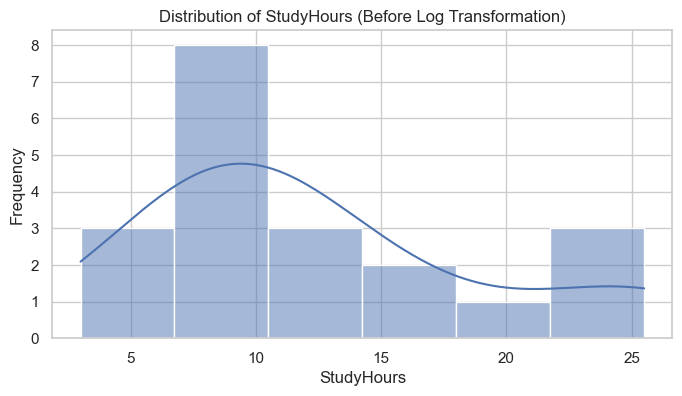

In [34]:
plt.figure(figsize=(8,4))
sns.histplot(data['StudyHours'], kde=True)
plt.title("Distribution of StudyHours (Before Log Transformation)")
plt.xlabel("StudyHours")
plt.ylabel("Frequency")
plt.show()

In [35]:
data['LogStudyHours'] = np.log(data['StudyHours'])

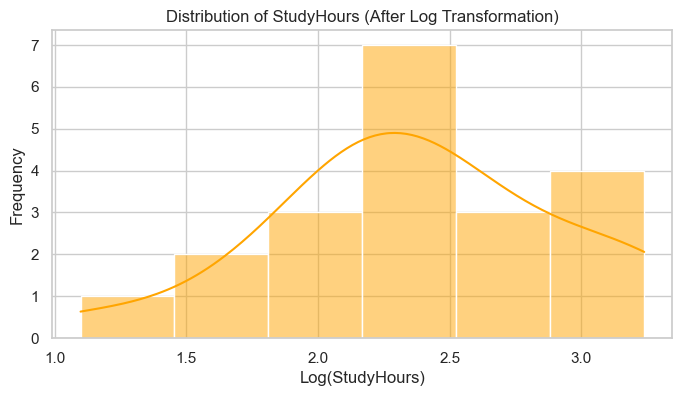

In [36]:
plt.figure(figsize=(8,4))
sns.histplot(data['LogStudyHours'], kde=True, color='orange')
plt.title("Distribution of StudyHours (After Log Transformation)")
plt.xlabel("Log(StudyHours)")
plt.ylabel("Frequency")
plt.show()

In [37]:
print("\nData with LogStudyHours added:")
print(data[['StudentID', 'StudyHours', 'LogStudyHours']])


Data with LogStudyHours added:
    StudentID  StudyHours  LogStudyHours
0           1        10.0       2.302585
1           2        15.0       2.708050
2           3         5.0       1.609438
3           4        20.0       2.995732
4           5         8.0       2.079442
5           6        25.5       3.238678
6           7         3.0       1.098612
7           8        10.0       2.302585
8           9        12.0       2.484907
9          10         9.0       2.197225
10         11        11.0       2.397895
11         12        25.0       3.218876
12         13         8.0       2.079442
13         14         7.0       1.945910
14         15        14.0       2.639057
15         16        10.0       2.302585
16         17         6.0       1.791759
17         18        15.0       2.708050
18         19        25.5       3.238678
19         20         9.0       2.197225
